#IDA

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact_manual
import plotly.express as px

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/stroke.csv')


Mounted at /content/drive


In [ ]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df.shape

(5110, 11)

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#Checking NA
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


#Data Cleaning

In [ ]:
# impute bmi column with mean and print  first ten

df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.head(10)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [ ]:
numerical = df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [ ]:
df.hypertension.value_counts()

,count
hypertension,
0,4612
1,498


([<matplotlib.patches.Wedge at 0x7c92891cf580>,
 [Text(-1.3348942113978373, 0.42196853481811436, 'No Hypertension'),
  Text(1.1441950298751005, -0.3616873423402018, 'Hypertension')],
 [Text(-0.8581462787557526, 0.2712654866687878, '90.3%'),
  Text(0.6674471007604752, -0.21098428303178438, '9.7%')])

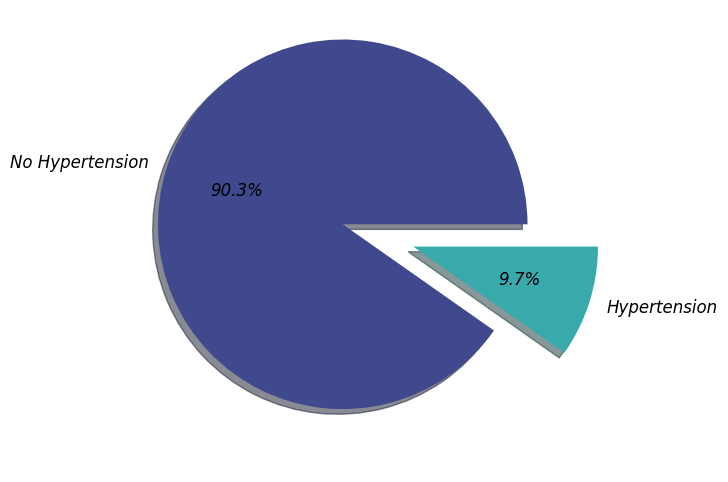

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df.hypertension.value_counts(),labels=['No Hypertension','Hypertension'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

In [ ]:
df.heart_disease.value_counts()

,count
heart_disease,
0,4834
1,276


([<matplotlib.patches.Wedge at 0x7c92875c15d0>,
 [Text(-1.3798936980729009, 0.23641781239723444, 'No Heart disease'),
  Text(1.182766015061574, -0.2026439084092213, 'Heart disease')],
 [Text(-0.8870745201897219, 0.1519828793982221, '94.6%'),
  Text(0.6899468421192514, -0.11820894657204575, '5.4%')])

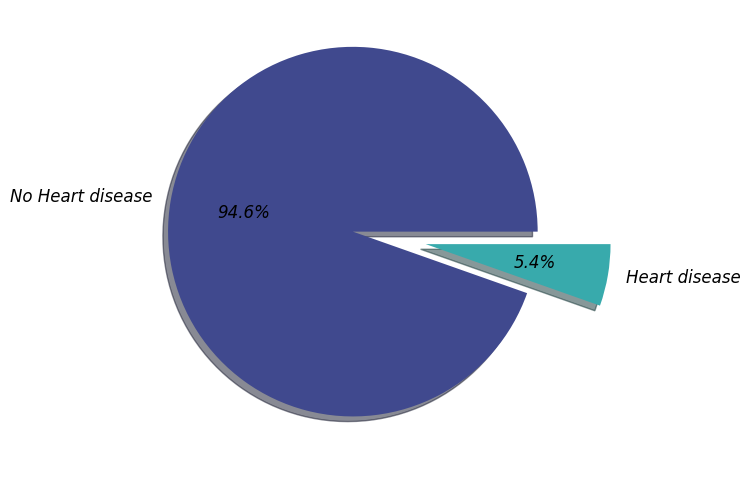

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df.heart_disease.value_counts(),labels=['No Heart disease','Heart disease'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

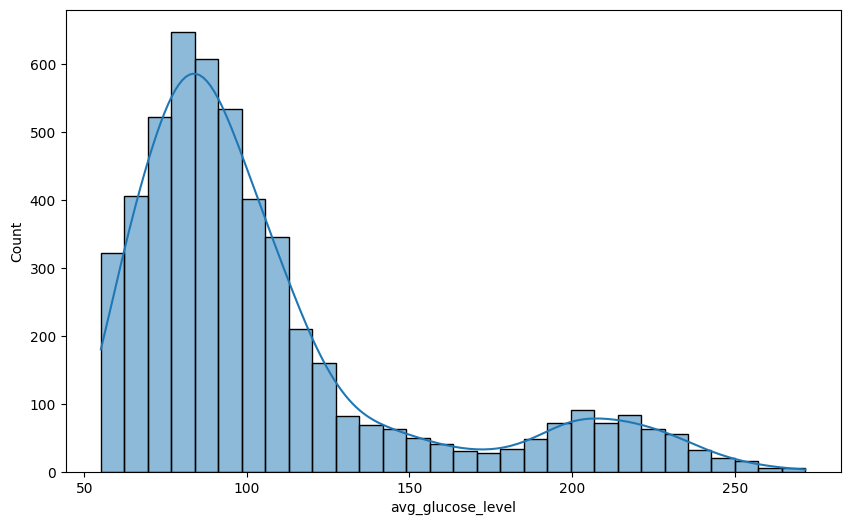

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df.avg_glucose_level,kde=True,bins=30)

<Axes: xlabel='bmi', ylabel='Count'>

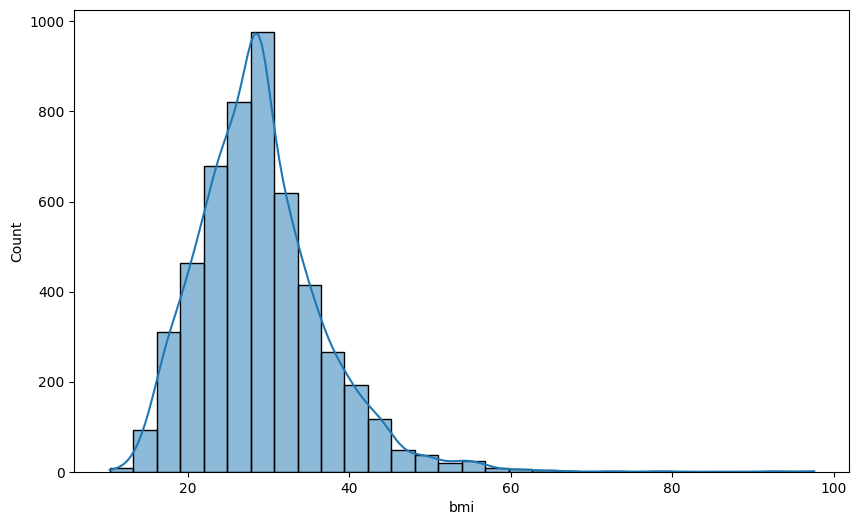

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df.bmi,kde=True,bins=30)

#Outliers

<Axes: ylabel='age'>

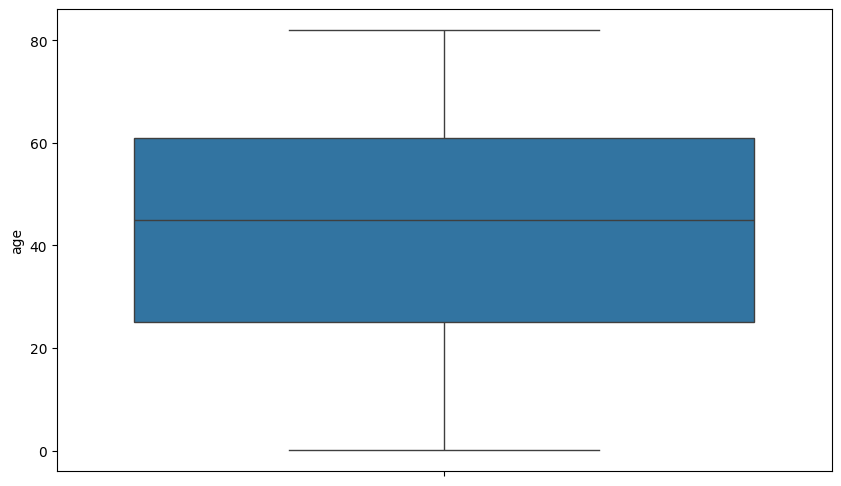

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df.age)

<Axes: ylabel='avg_glucose_level'>

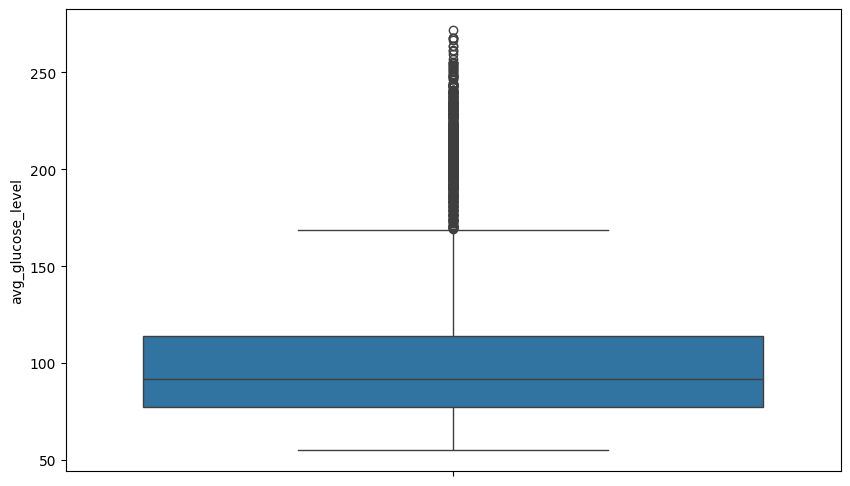

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df.avg_glucose_level)

<Axes: ylabel='bmi'>

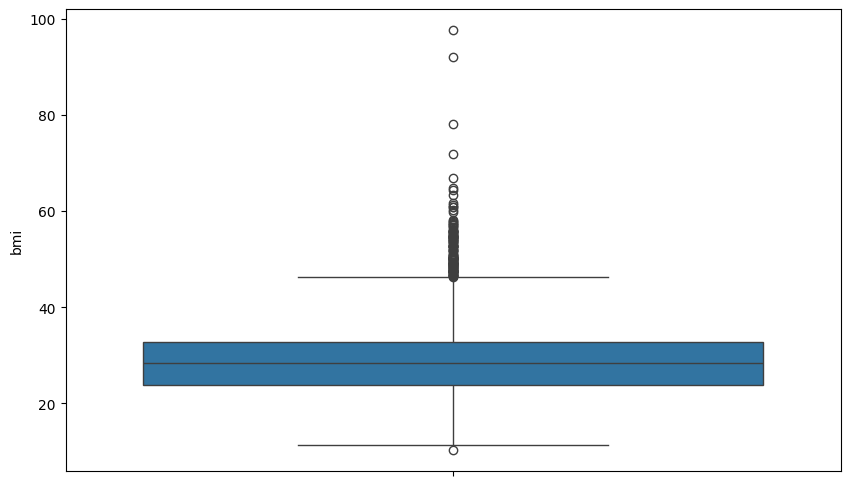

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df.bmi)

In [ ]:
# prompt: handle outlier from avg_glucose_level and bmi dont remove it

import numpy as np
def handle_outliers_with_capping(df, column):
  """Handles outliers by capping them at a specified percentile."""
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

  return df

df = handle_outliers_with_capping(df, 'avg_glucose_level')
df = handle_outliers_with_capping(df, 'bmi')


<Axes: ylabel='bmi'>

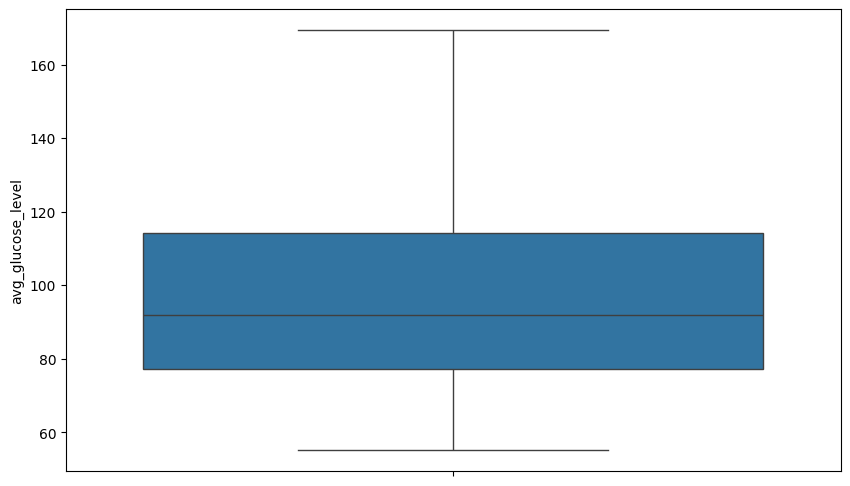

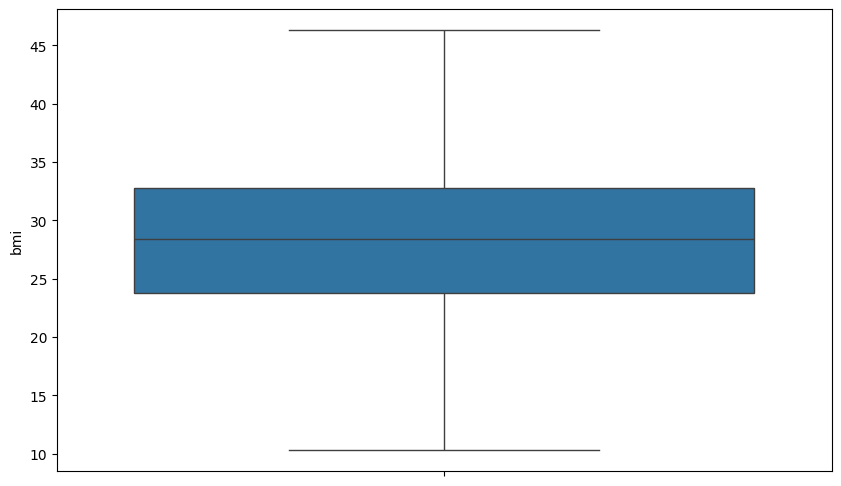

In [ ]:
# prompt: print boxplot back

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.boxplot(df.avg_glucose_level)
plt.figure(figsize=(10,6))
sns.boxplot(df.bmi)


# Scalling numeric data

In [ ]:
# prompt: standardize only age, avg_glucose_level and bmi

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select the columns to standardize
cols_to_standardize = ['age', 'avg_glucose_level', 'bmi']

# Fit and transform the selected columns
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.051434,0,1,Yes,Private,Urban,2.058363,1.106633,formerly smoked,1
1,Female,0.786070,0,0,Yes,Self-employed,Rural,2.058363,0.024107,never smoked,1
2,Male,1.626390,0,1,Yes,Private,Rural,0.148256,0.530729,never smoked,1
3,Female,0.255342,0,0,Yes,Private,Urban,2.058363,0.797611,smokes,1
4,Female,1.582163,1,0,Yes,Self-employed,Rural,2.058363,-0.663218,never smoked,1


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5.110000e+03,5110.000000,5110.000000,5.110000e+03,5.110000e+03,5110.000000
mean,5.005781e-17,0.097456,0.054012,-3.392807e-16,1.668594e-17,0.048728
std,1.000098e+00,0.296607,0.226063,1.000098e+00,1.000098e+00,0.215320
min,-1.908261e+00,0.000000,0.000000,-1.381335e+00,-2.587580e+00,0.000000
25%,-8.061152e-01,0.000000,0.000000,-7.151503e-01,-6.913112e-01,0.000000
50%,7.843218e-02,0.000000,0.000000,-2.743389e-01,-4.517511e-02,0.000000
75%,7.860701e-01,0.000000,0.000000,3.942550e-01,5.728681e-01,0.000000
max,1.714845e+00,1.000000,1.000000,2.058363e+00,2.469137e+00,1.000000


# Discrete data

In [ ]:
categories = df.select_dtypes(include=['object']).columns.tolist()
categories

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
df.gender.value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [ ]:
df.drop(df[df.gender == 'Other'].index,inplace=True)
df.reset_index(drop=True,inplace=True)

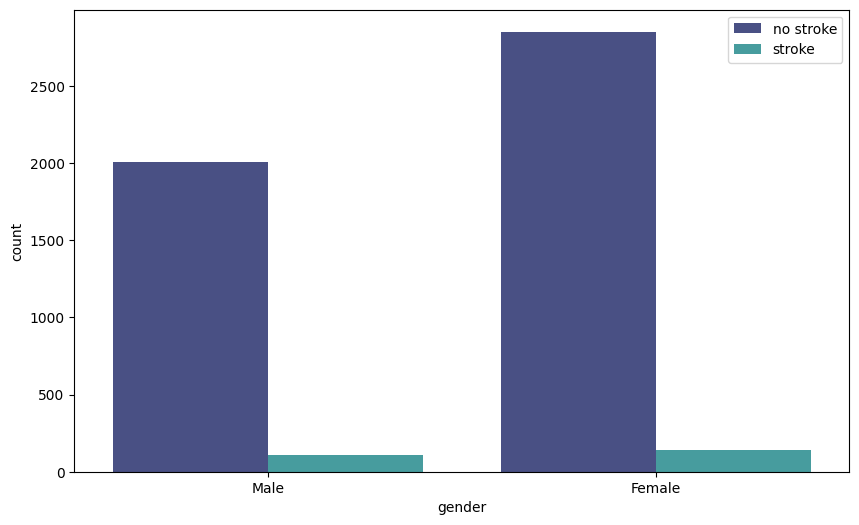

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="gender", data=df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [ ]:
# prompt: one hot encoding gender to male and female and give value 1 and 0

# Create dummy variables for 'gender'
gender_dummies = pd.get_dummies(df['gender'], prefix='gender')

# Keep only 'Male' and 'Female' columns (assuming you want to encode as 1 and 0)
gender_dummies = gender_dummies[['gender_Male', 'gender_Female']]

# Rename the columns to 'Male' and 'Female'
gender_dummies.rename(columns={'gender_Male': 'Male', 'gender_Female': 'Female'}, inplace=True)

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, gender_dummies], axis=1)

# Optionally, drop the original 'gender' column
df.drop('gender', axis=1, inplace=True)

In [ ]:
# prompt: column male and female turn the true to 1 and false to 0

# Replace True with 1 and False with 0 in 'Male' and 'Female' columns
df['Male'] = df['Male'].astype(int)
df['Female'] = df['Female'].astype(int)
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male,Female
0,1.051434,0,1,Yes,Private,Urban,2.058363,1.106633,formerly smoked,1,1,0
1,0.786070,0,0,Yes,Self-employed,Rural,2.058363,0.024107,never smoked,1,0,1
2,1.626390,0,1,Yes,Private,Rural,0.148256,0.530729,never smoked,1,1,0
3,0.255342,0,0,Yes,Private,Urban,2.058363,0.797611,smokes,1,0,1
4,1.582163,1,0,Yes,Self-employed,Rural,2.058363,-0.663218,never smoked,1,0,1


In [ ]:
df.ever_married.value_counts()

,count
ever_married,
Yes,3353
No,1756


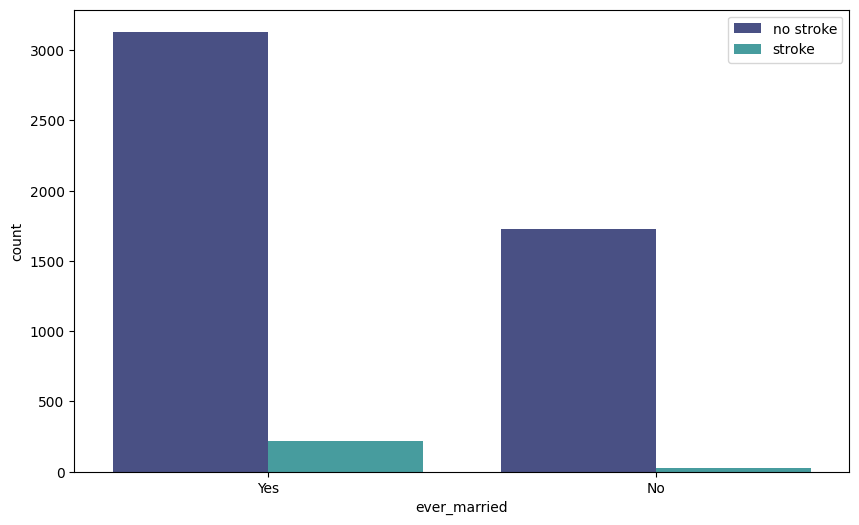

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="ever_married", data=df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [ ]:
df.ever_married = df.ever_married.map({'No':0,'Yes':1})

In [ ]:
df.work_type.value_counts()

,count
work_type,
Private,2924
Self-employed,819
children,687
Govt_job,657
Never_worked,22


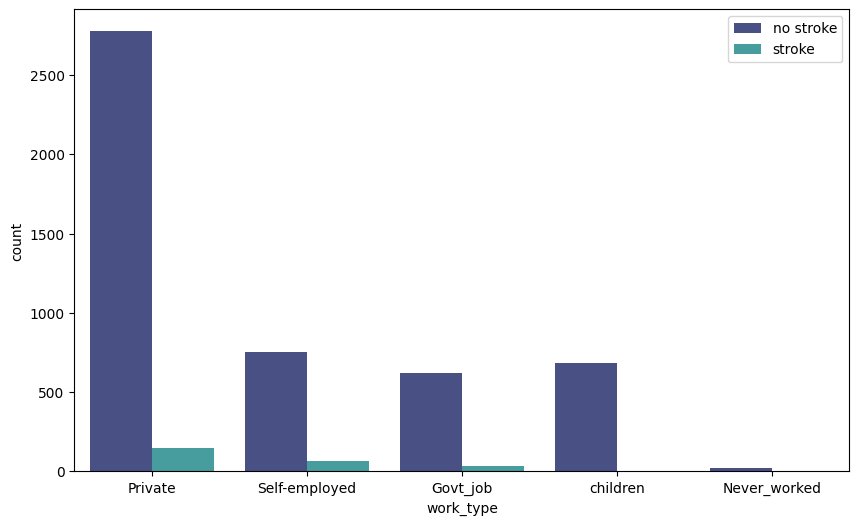

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="work_type", data=df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [ ]:
# prompt: for work_type i want one hot encoding with value 1 and 0 under each column 1 for false and 0 for true

import pandas as pd
# Create dummy variables for 'work_type'
work_type_dummies = pd.get_dummies(df['work_type'], prefix='work_type', dtype=int)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, work_type_dummies], axis=1)

# Drop the original 'work_type' column
df.drop('work_type', axis=1, inplace=True)

# Display the updated DataFrame
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male,Female,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1.051434,0,1,1,Urban,2.058363,1.106633,formerly smoked,1,1,0,0,0,1,0,0
1,0.786070,0,0,1,Rural,2.058363,0.024107,never smoked,1,0,1,0,0,0,1,0
2,1.626390,0,1,1,Rural,0.148256,0.530729,never smoked,1,1,0,0,0,1,0,0
3,0.255342,0,0,1,Urban,2.058363,0.797611,smokes,1,0,1,0,0,1,0,0
4,1.582163,1,0,1,Rural,2.058363,-0.663218,never smoked,1,0,1,0,0,0,1,0


In [ ]:
df.Residence_type.value_counts()

,count
Residence_type,
Urban,2596
Rural,2513


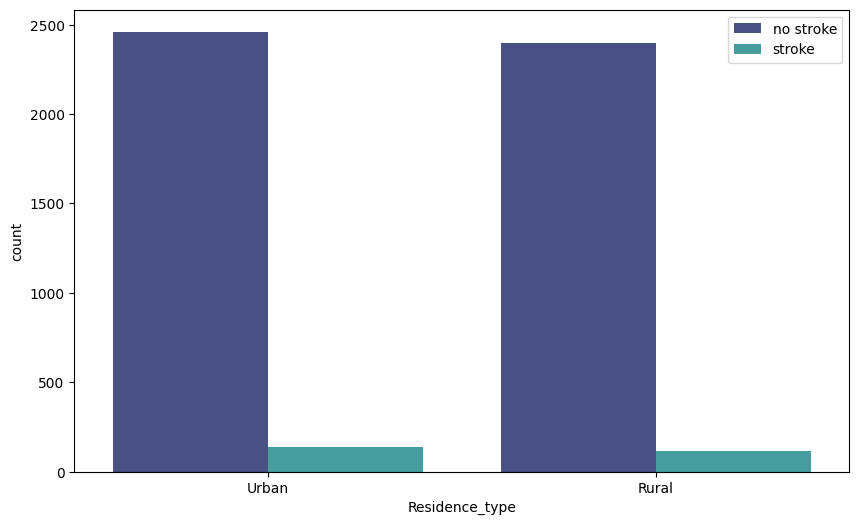

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Residence_type", data=df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [ ]:
df.Residence_type = df.Residence_type.map({'Urban':0,'Rural':1})

In [ ]:
df.smoking_status.value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,884
smokes,789


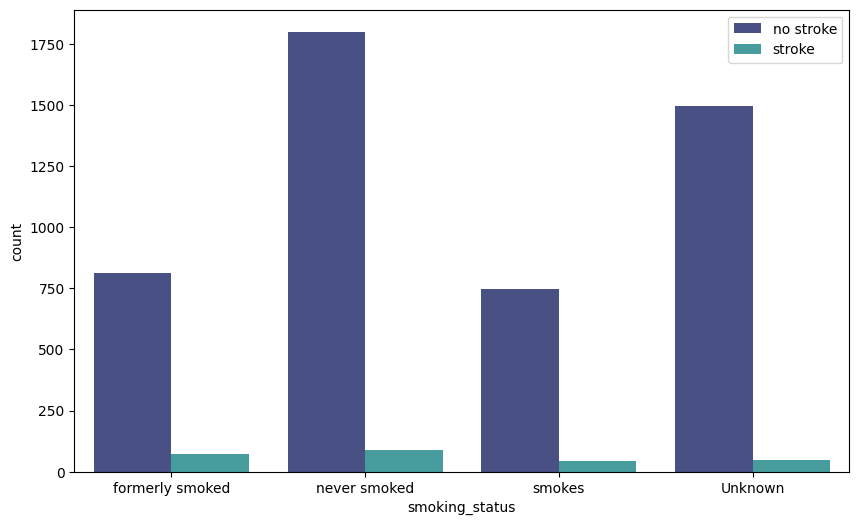

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="smoking_status", data=df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [ ]:
# prompt: for smoking_status i want one hot encoding with value 1 and 0 under each column 1 for false and 0 for true

import pandas as pd
# Create dummy variables for 'smoking_status'
smoking_status_dummies = pd.get_dummies(df['smoking_status'], prefix='smoking_status', dtype=int)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, smoking_status_dummies], axis=1)

# Drop the original 'smoking_status' column
df.drop('smoking_status', axis=1, inplace=True)

# Display the updated DataFrame
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Male,Female,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,0,1,1,0,2.058363,1.106633,1,1,0,0,0,1,0,0,0,1,0,0
1,0.786070,0,0,1,1,2.058363,0.024107,1,0,1,0,0,0,1,0,0,0,1,0
2,1.626390,0,1,1,1,0.148256,0.530729,1,1,0,0,0,1,0,0,0,0,1,0
3,0.255342,0,0,1,0,2.058363,0.797611,1,0,1,0,0,1,0,0,0,0,0,1
4,1.582163,1,0,1,1,2.058363,-0.663218,1,0,1,0,0,0,1,0,0,0,1,0


<Axes: >

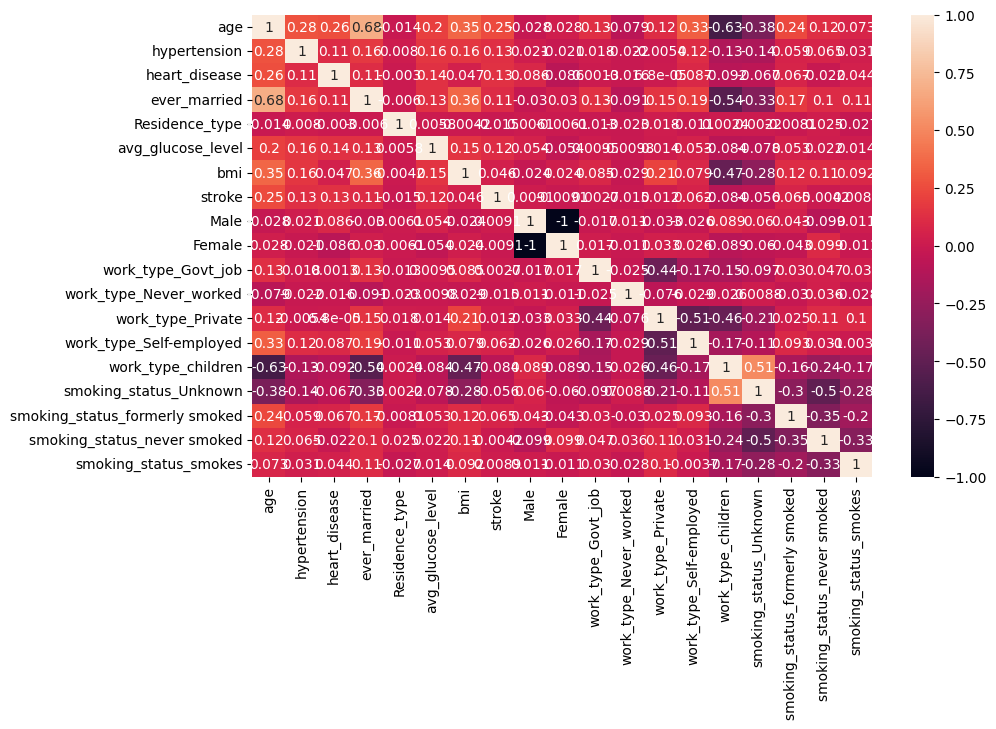

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# prompt: check for skewness

# Check skewness
for feature in df:
  print(f"Skewness of {feature}: {df[feature].skew()}")


Skewness of age: -0.1374301926292132
Skewness of hypertension: 2.715026136949753
Skewness of heart_disease: 3.9467864430646906
Skewness of ever_married: -0.6583448179224691
Skewness of Residence_type: 0.03250551429923471
Skewness of avg_glucose_level: 0.9360521830491011
Skewness of bmi: 0.4359664055303228
Skewness of stroke: 4.1928068074994735
Skewness of Male: 0.34940999903864667
Skewness of Female: -0.3494099990386462
Skewness of work_type_Govt_job: 2.219622177275417
Skewness of work_type_Never_worked: 15.144843094175494
Skewness of work_type_Private: -0.29245400379529657
Skewness of work_type_Self-employed: 1.8523009713864769
Skewness of work_type_children: 2.143534146838143
Skewness of smoking_status_Unknown: 0.861668935428292
Skewness of smoking_status_formerly smoked: 1.729276836850054
Skewness of smoking_status_never smoked: 0.5372263669183076
Skewness of smoking_status_smokes: 1.9131317548025093


In [ ]:
# prompt: check missing value

df.isnull().sum()


,0
age,0
hypertension,0
heart_disease,0
ever_married,0
Residence_type,0
avg_glucose_level,0
bmi,0
stroke,0
Male,0
Female,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
!pip install Boruta
from boruta import BorutaPy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assume 'df' is your dataframe
x = df.drop('stroke', axis=1)
y = pd.to_numeric(df['stroke'])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.6 MB/s eta 0:00:00


In [ ]:
# Setup the resampling pipeline
adasyn = ADASYN(random_state=42)
enn = EditedNearestNeighbours()
adasyn_enn = Pipeline([
    ('adasyn', adasyn),  # First apply ADASYN
    ('enn', enn)         # Then clean with ENN
])

# Apply the pipeline to resample the entire dataset
X_resampled, y_resampled = adasyn_enn.fit_resample(x, y)

In [ ]:
# prompt: # prompt: show result before and after sampling

# Print the class distribution before sampling
print("Before Sampling:")
print(y.value_counts())

# Print the class distribution after sampling
print("\nAfter Sampling:")
print(y_resampled.value_counts())

Before Sampling:
stroke
0    4860
1     249
Name: count, dtype: int64

After Sampling:
stroke
1    4765
0    3848
Name: count, dtype: int64


In [ ]:
# Feature selection with Boruta
rf_for_boruta = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
boruta_selector = BorutaPy(rf_for_boruta, n_estimators='auto', verbose=2, random_state=1)

# Fit Boruta to the resampled data
boruta_selector.fit(np.array(X_resampled), np.array(y_resampled))

# Filter selected features
selected_features = X_resampled.columns[boruta_selector.support_]
print("Selected Features:")
print(selected_features)


# Get the ranking of features from Boruta
feature_rankings = boruta_selector.ranking_
feature_ranking_df = pd.DataFrame({'Feature': X_resampled.columns, 'Ranking': feature_rankings})

# Display the feature rankings
print("\nFeature Rankings:")
print(feature_ranking_df.sort_values(by='Ranking'))




Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	0
Rejected: 	1


BorutaPy finished running.

Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	0
Rejected: 	1
Selected Features:
Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'Male', 'Female',
       'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never s

In [ ]:
# Split the data into training and test sets after resampling and feature selection
X_train, X_test, y_train, y_test = train_test_split(X_resampled[selected_features], y_resampled, test_size=0.2, random_state=42)

#Random Forest


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       765
           1       0.97      0.99      0.98       958

    accuracy                           0.98      1723
   macro avg       0.98      0.98      0.98      1723
weighted avg       0.98      0.98      0.98      1723



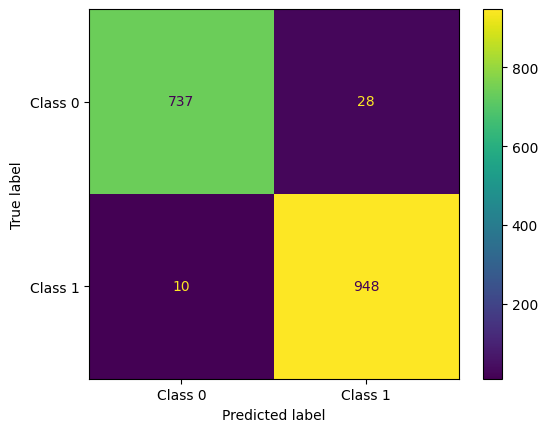

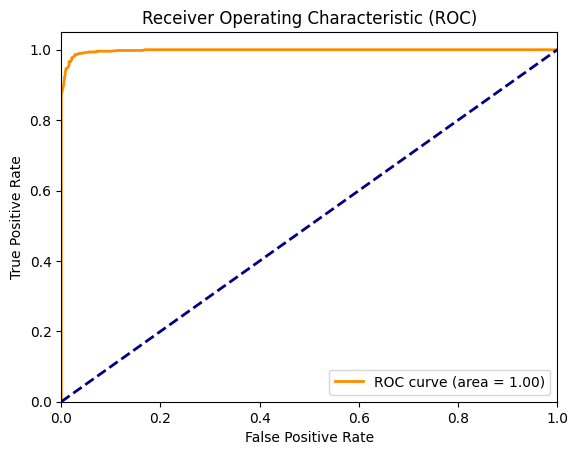

In [ ]:
# Train the RandomForest model
model = RandomForestClassifier(random_state=1234)
model.fit(X_train, y_train)

# Making predictions and evaluating the model on the test set
y_pred = model.predict(X_test)
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Class 0', 'Class 1']).plot()

# Plot ROC curve and calculate AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# prompt: save this model to google drive

import pickle
from google.colab import drive

drive.mount('/content/drive')

# Assuming your model is named 'model'
model_filename = '/content/drive/My Drive/Colab Notebooks/stroke3_model.pkl'  # Choose a file path in your Google Drive

# Save the model using pickle
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to: {model_filename}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to: /content/drive/My Drive/Colab Notebooks/stroke3_model.pkl


#Logistic regression


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       765
           1       0.89      0.92      0.90       958

    accuracy                           0.89      1723
   macro avg       0.89      0.89      0.89      1723
weighted avg       0.89      0.89      0.89      1723



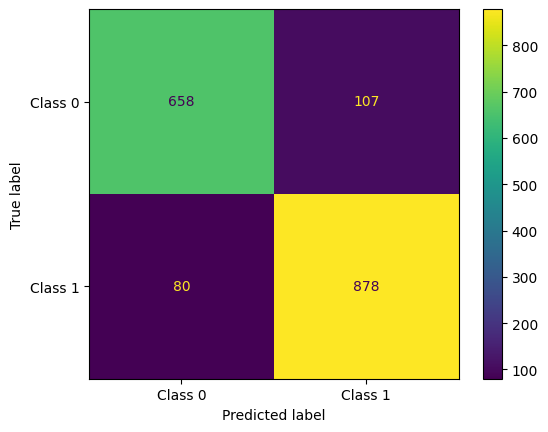

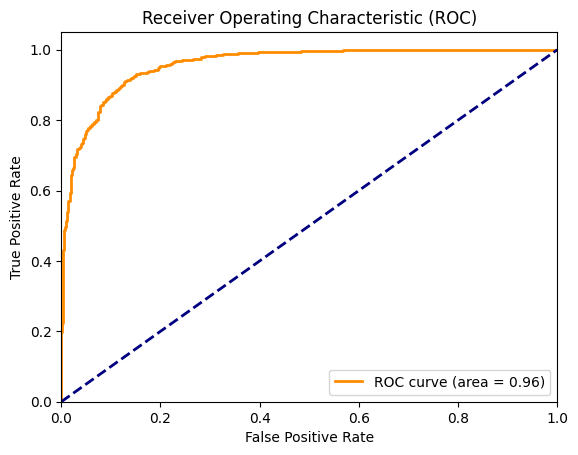

In [ ]:
# Import the necessary class from sklearn.linear_model
from sklearn.linear_model import LogisticRegression


# Train the Logistic Regression model
model = LogisticRegression(random_state=1234, max_iter=1000)
model.fit(X_train, y_train)

# Making predictions and evaluating the model on the test set
y_pred = model.predict(X_test)
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Class 0', 'Class 1']).plot()

# Plot ROC curve and calculate AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#KNN


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       765
           1       0.95      1.00      0.97       958

    accuracy                           0.97      1723
   macro avg       0.97      0.96      0.97      1723
weighted avg       0.97      0.97      0.97      1723



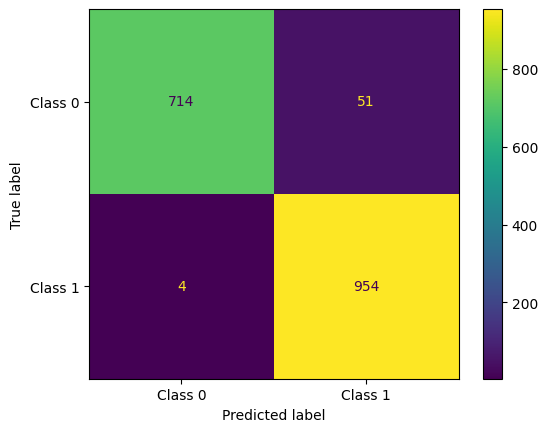

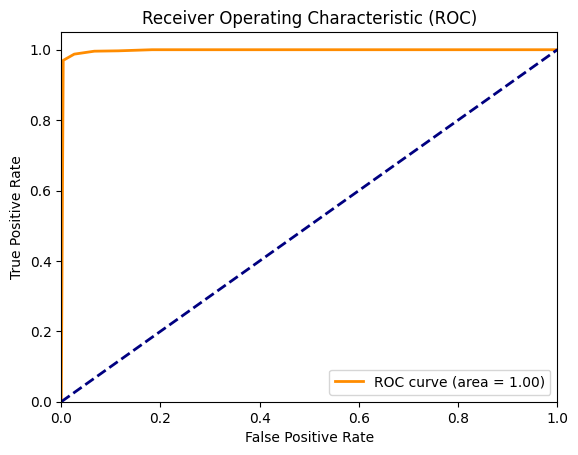

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

# Making predictions and evaluating the model on the test set
y_pred = knn_model.predict(X_test)
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Class 0', 'Class 1']).plot()

# Plot ROC curve and calculate AUC for KNN
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


#ANN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.6578 - loss: 0.5797 - val_accuracy: 0.8795 - val_loss: 0.2928
Epoch 2/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8760 - loss: 0.3129 - val_accuracy: 0.9013 - val_loss: 0.2431
Epoch 3/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8999 - loss: 0.2718 - val_accuracy: 0.9064 - val_loss: 0.2446
Epoch 4/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9156 - loss: 0.2211 - val_accuracy: 0.9340 - val_loss: 0.1796
Epoch 5/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9326 - loss: 0.2001 - val_accuracy: 0.9383 - val_loss: 0.1756
Epoch 6/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9310 - loss: 0.1764 - val_accuracy: 0.9405 - val_loss: 0.1621
Epoch 7/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9381 - loss: 0.1750 - val_accuracy: 0.9507 - val_loss: 0.1572
Epoch 8/100
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9442 - loss: 0.1657 - val_ac

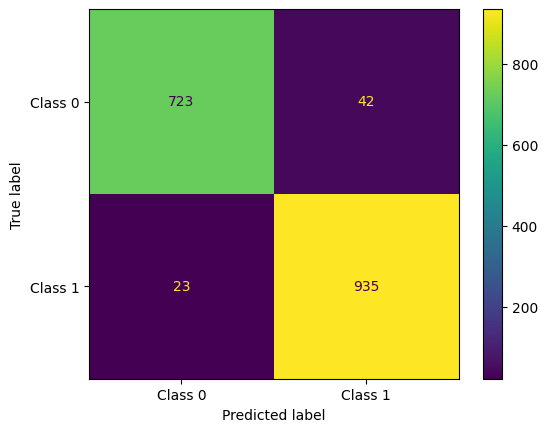

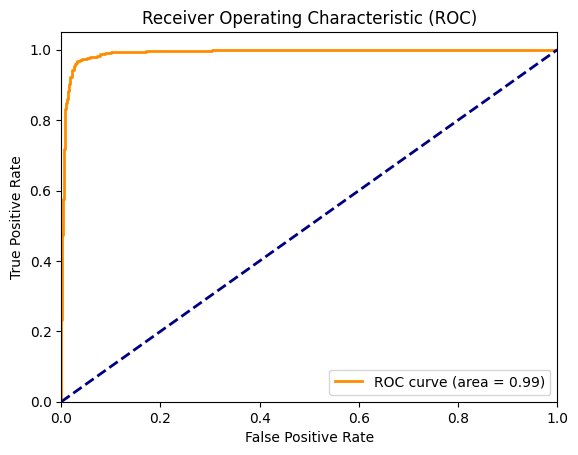

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Build a 10-layer ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
for _ in range(8):  # Adding 8 hidden layers
    ann_model.add(Dense(64, activation='relu'))
    ann_model.add(Dropout(0.2))  # Optional: Dropout to prevent overfitting
ann_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = ann_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Making predictions and evaluating the model on the test set
y_pred = (ann_model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions

print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Class 0', 'Class 1']).plot()

# Plot ROC curve and calculate AUC for the ANN model
y_pred_proba = ann_model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


#XGBoost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:12:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       765
           1       0.96      0.99      0.97       958

    accuracy                           0.97      1723
   macro avg       0.97      0.97      0.97      1723
weighted avg       0.97      0.97      0.97      1723



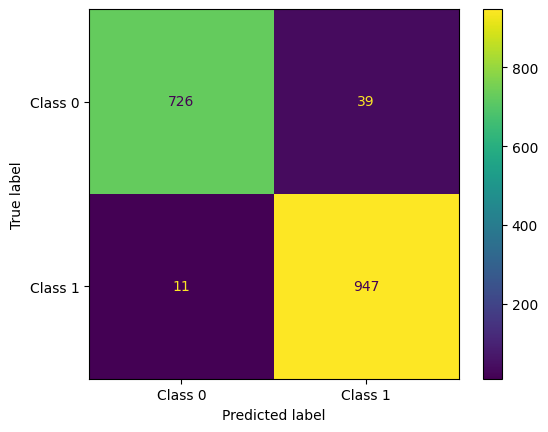

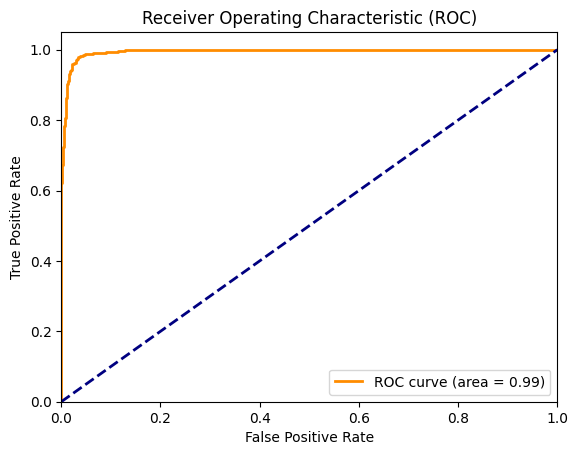

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1234)
xgb_model.fit(X_train, y_train)

# Making predictions and evaluating the model on the test set
y_pred = xgb_model.predict(X_test)
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Class 0', 'Class 1']).plot()

# Plot ROC curve and calculate AUC for the XGBoost model
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


#Decision Tree


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       765
           1       0.92      0.95      0.93       958

    accuracy                           0.92      1723
   macro avg       0.92      0.92      0.92      1723
weighted avg       0.92      0.92      0.92      1723



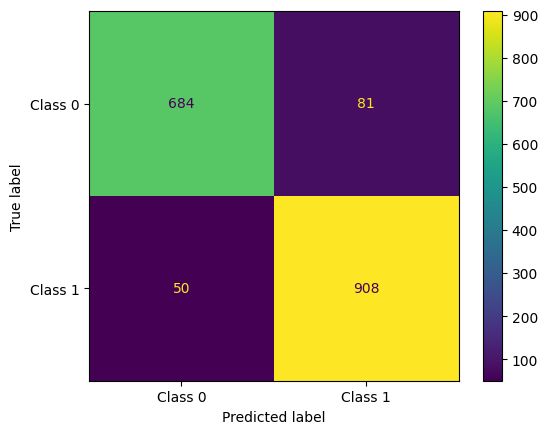

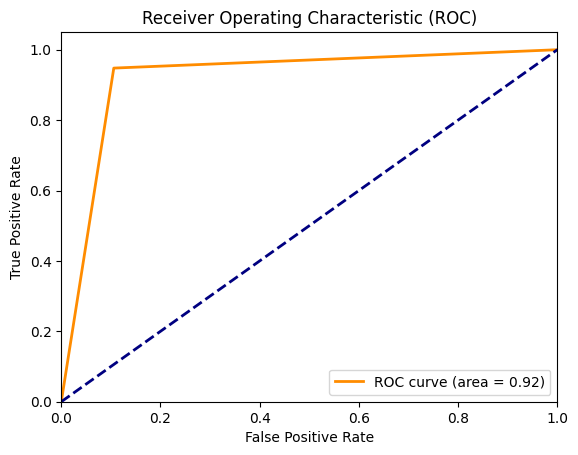

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=1234)
dt_model.fit(X_train, y_train)

# Making predictions and evaluating the model on the test set
y_pred = dt_model.predict(X_test)
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Class 0', 'Class 1']).plot()

# Plot ROC curve and calculate AUC for the Decision Tree model
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


#SVM


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       765
           1       0.93      0.98      0.95       958

    accuracy                           0.95      1723
   macro avg       0.95      0.94      0.95      1723
weighted avg       0.95      0.95      0.95      1723



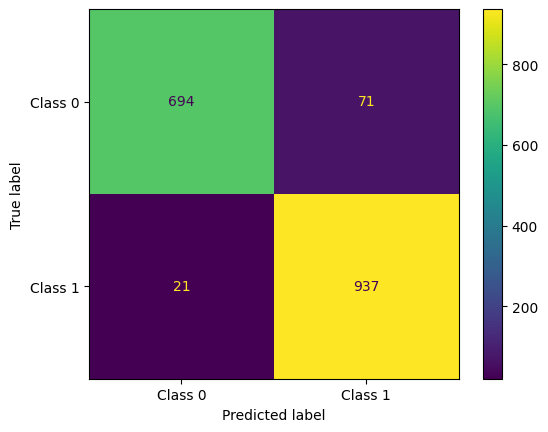

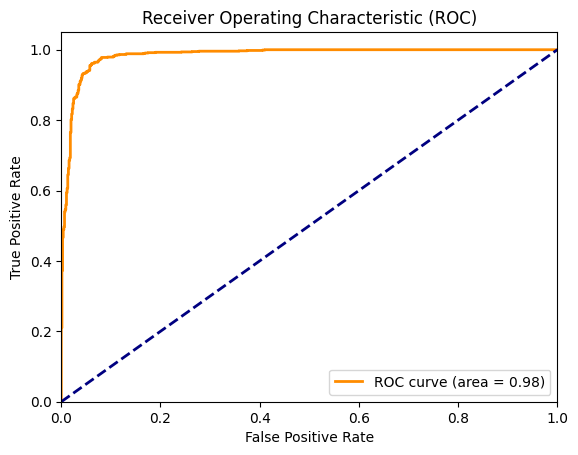

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Train the SVM model
svm_model = SVC(probability=True, random_state=1234)
svm_model.fit(X_train, y_train)

# Making predictions and evaluating the model on the test set
y_pred = svm_model.predict(X_test)
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Class 0', 'Class 1']).plot()

# Plot ROC curve and calculate AUC for the SVM model
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# prompt: hyperparameter tuning svm above with random search with 10 fold

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold


# Define the parameter grid for random search for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    'degree': [2, 3, 4]  # Only applicable for polynomial kernel
}

# Create an SVM model
svm_model = SVC(probability=True, random_state=42)

# Create the RandomizedSearchCV object with 10-fold cross-validation
random_search_svm = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_grid_svm,
    n_iter=100,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),  # 10-fold stratified cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search to the data
random_search_svm.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found for SVM: ", random_search_svm.best_params_)
print("Best score for SVM: ", random_search_svm.best_score_)

# Train a model with the best hyperparameters
best_svm_model = random_search_svm.best_estimator_

# You can then evaluate the best model on the test set
y_pred_best_svm = best_svm_model.predict(X_test)
print(classification_report(y_test, y_pred_best_svm))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


KeyboardInterrupt: 